In [328]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
# Above line of code will implement every figure implemented using matplotlib of size 20 X 10
# There are differnt parameters such as figure size, font sizes, line widths, and more that can be implemented

In [329]:
file = pd.read_csv("Datasets/Bengaluru_House_Data.csv")

In [330]:
file.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [331]:
# Lets drop some columns which I think are not that useful

In [332]:
file = file.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')

In [333]:
file.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [334]:
file.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [335]:
file.shape

(13320, 5)

In [336]:
# There are lot more number of records than that of the rows present in the dataset
# Hence we can drop the rows which contains null values
# Or we can replace the null values with median values too

In [337]:
file = file.dropna()

In [338]:
file.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [339]:
file.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [340]:
file.shape

(13246, 5)

In [341]:
file = file.dropna()

In [342]:
file.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Edit some of the features that we want to use in the future

In [343]:
# Now all the null values are droped from the dataset

In [344]:
file['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [345]:
# Have a look we have got size factor in different paramters 
# Some rooms size is given in the form of BHK while some in the form of Bedrooms
# We will clear this using the function given below

In [346]:
def total_rooms(size):
    return int(size.split(' ')[0])

In [347]:
total_rooms('5 Bedroom')

5

In [348]:
# Look we have got the size of number of the rooms in the form of numeric values

In [349]:
file['bhk'] = file['size'].apply(total_rooms)

In [350]:
file.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [351]:
file.shape

(13246, 6)

In [352]:
file['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [353]:
# It seems that there are differnt types of values when we consider the total_sqft feature of the dataset
# Hence we have to consider if they are numbers string or they are values of certain range

In [354]:
def is_float(sqft):
    try:
        float(sqft)
    except:
        return False
    return True

In [355]:
file[~file['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [356]:
# Now we have data in the form of range as well as data in the form of Sq. Meter and no one knows if there is total_sqft in 
# any other data value form

In [357]:
# We will only conider data in the range form and then apply avg function over data

In [358]:
def get_avg(sqft):
    numbers = sqft.split('-')
    if len(numbers) == 2:
        return (float(numbers[0]) + float(numbers[1])) / 2
    try:
        return float(sqft)
    except:
        return None

In [359]:
get_avg('34.46Sq. Meter	')

In [360]:
get_avg('1042 - 1105')

1073.5

In [361]:
file['total_sqft'] = file.total_sqft.apply(get_avg)

In [362]:
# It looks like it will give us the average value of the sqft value of the house

In [363]:
file.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [364]:
# Here we have got some of the null values as these values are more removed as they were in the form which we didn;t require
file = file[file.total_sqft.notnull()]

In [365]:
file.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [366]:
# Now lets calculate the price per sqft so that it will be easy to predict the price and it will be in unitary form

In [367]:
file['price_per_sqft'] = (file['price'] * 100000) / file['total_sqft']

In [368]:
file.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [369]:
file['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [370]:
# Now we have got pretty much of the data that we wanted to have basically in the dataframe
# Now lets export it to the environment as an csv file

In [371]:
file.to_csv("Datasets/bhp.csv",index=False)

In [372]:
# file.groupby('location').describe()

In [373]:
# It seems that there are different numbers location in the bangalore city for which the price of the house is given
# lets find how many are there

In [374]:
# First we will have done data cleaning first and then we will do some data cleaning
len(file.location.unique())

1298

In [375]:
# So there are total of 1298 location for which we might have to find the price for
# But few of them might have come very few times so we can conclude that we can add them into other category
# Before that we will perform data cleaning by stripping the values

In [376]:
file.location = file.location.apply(lambda x : x.strip())

In [377]:
location_stats = file['location'].value_counts(ascending=False)
location_stats
# here we have listed all the locations into their decreasing count of the occurences

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [378]:
location_stats.values.sum()

13200

In [379]:
len(location_stats)

1287

In [380]:
len(location_stats[location_stats>10])

240

In [381]:
len(location_stats[location_stats<=10])

1047

In [382]:
file.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [383]:
# From above analysis we can conclude that there are various locations where there value is less than 10
# i.e they occur very less number of times
# Hence we can add those data points into the other category

In [384]:
count_less_than_ten = location_stats[location_stats<=10]
count_less_than_ten

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [391]:
file['location'] = file.location.apply(lambda x : 'others' if x in count_less_than_ten else x)

In [392]:
len(file.location.unique())

241

In [393]:
# Now the count is 242 and hence we can have less number of columns than that of previous one

In [394]:
file.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [395]:
# As of now we have made some data cleaning techniques
# Now we are going to make some outlier removal and on various data columns

In [397]:
# Now if we get any domain expert then they can tell us that for one bhk home there is need of 300 sqft
# Hence we can remove those outliers which have more more bedrooms in the given area
file[(file.total_sqft / file.bhk) < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [400]:
file.shape

(13200, 7)

In [403]:
file = file[(file.total_sqft / file.bhk) >= 300]
# as we want one bed in 300 sqft area hence we will have remove those element whose number of beds are more in specific area

In [404]:
file.shape

(12456, 7)

In [405]:
file.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [406]:
file.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [407]:
def remove_pps_outlier(file):
    data_out = pd.DataFrame()
    for key, value in file.groupby('location'):
        mean = np.mean(value.price_per_sqft)
        std = np.std(value.price_per_sqft)
        reduced_df = value[(value.price_per_sqft > (mean - std)) & (value.price_per_sqft <= (mean + std))]
        data_out = pd.concat([data_out, reduced_df], ignore_index=True)
    return data_out

In [408]:
# Above method is used to take file as input and then this file is divided into key and value in the form of dictionary based on
# the category of location and hence after calculating mean and standard deviation for each of the location only those values which
# falls under first standard deviation are included into the data Frame that is to be returned 

In [412]:
file = remove_pps_outlier(file)

In [413]:
file.shape

(10242, 7)

In [414]:
# Here the values which are beyond the first standard deviation are deleted from the dataset and then they are stored in new df

In [421]:
def plot_scatter_plot(file, location):
    bhk2 = file[(file.location == location) & (file.bhk == 2)]
    bhk3 = file[(file.location == location) & (file.bhk == 3)]
#     matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', marker='+')
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'red', marker='o')
    plt.xlabel("Locations")
    plt.ylabel("Price")
    plt.title("Locations")
    plt.legend()
    


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


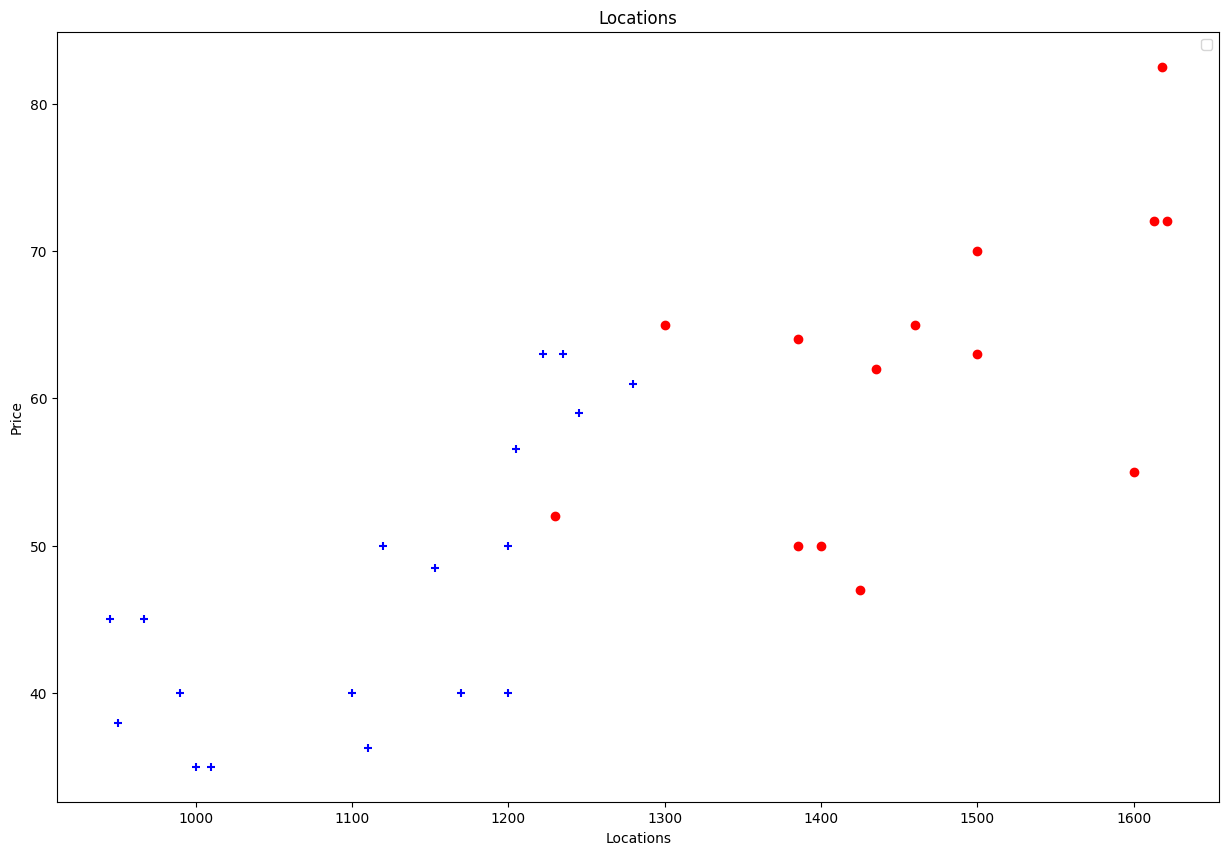

In [426]:
plot_scatter_plot(file, "Gottigere")

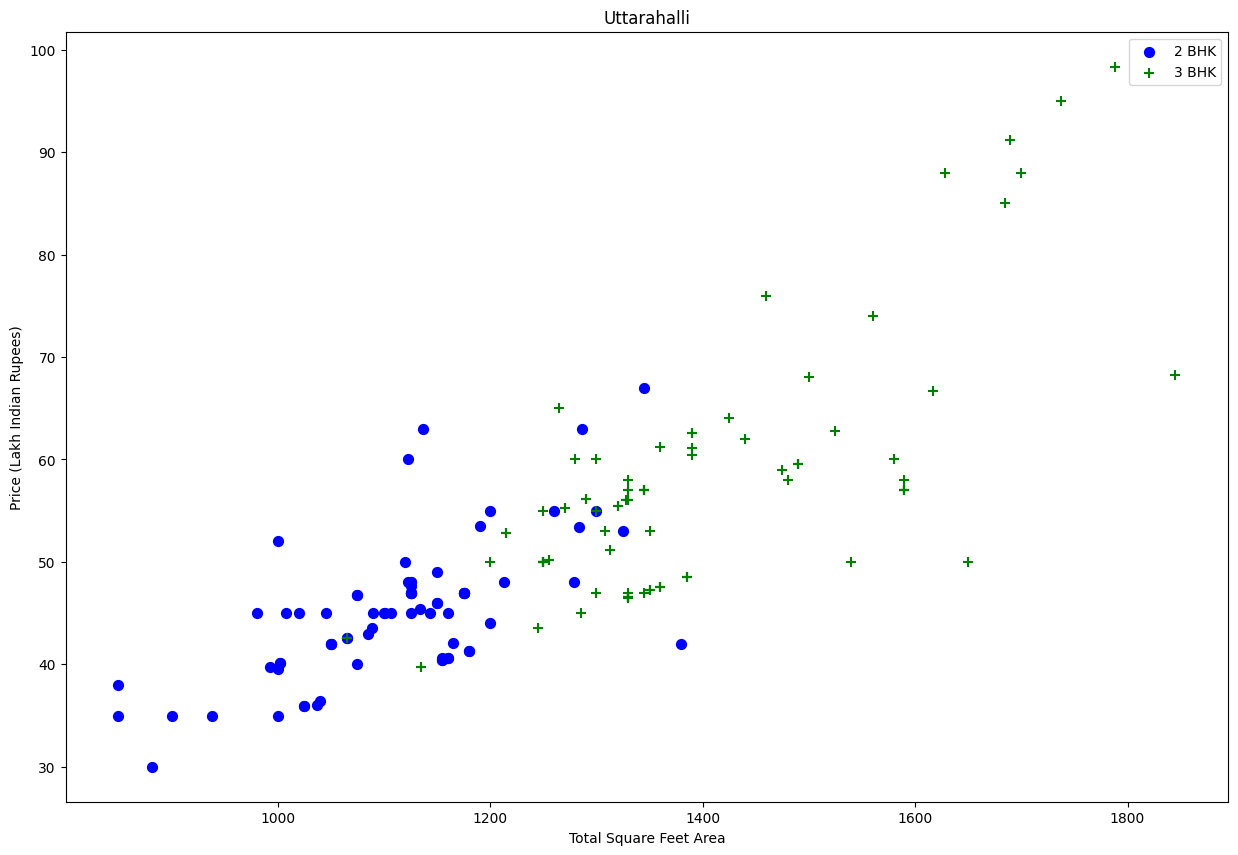

In [427]:
plot_scatter_chart(file,"Uttarahalli")

Now if we consider prices of the house wrt their locations, now we will exclude those data points for which the values of the house is less for 3bhk and more for 2bhk in the same area. These are the prices that needs to be removed from the data.
Here we will create a dictionary of dictionary for each location we will have mean and std for 2bhk and 3bhk and we will try to exclude those data points where price of 2bhk is more than 1 bhk in particular location

The dictionary willl be pretty much like this


In [429]:
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },    
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [435]:
def remove_bhk_outliers(file):
    index_excluded = np.array([])
    for location, location_df in file.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                index_excluded = np.append(index_excluded, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return file.drop(index_excluded,axis='index')
file = remove_bhk_outliers(file)
file.shape

(7317, 7)

In [436]:
# As now we have removed outliers hence we will have the the clean graph and hence it will be like

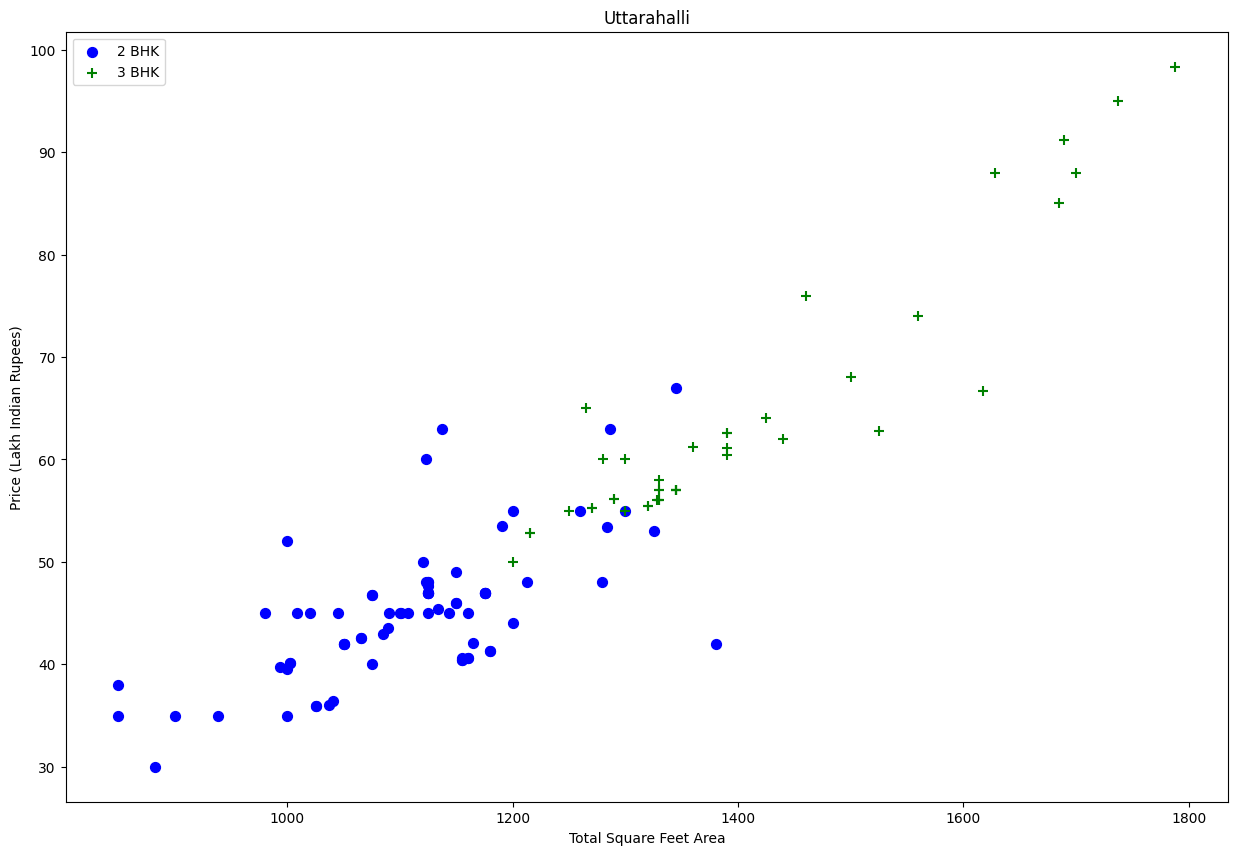

In [438]:
plot_scatter_chart(file,"Uttarahalli")

In [439]:
# there is noticable difference between the two graphs that are created there

Text(0, 0.5, 'Count')

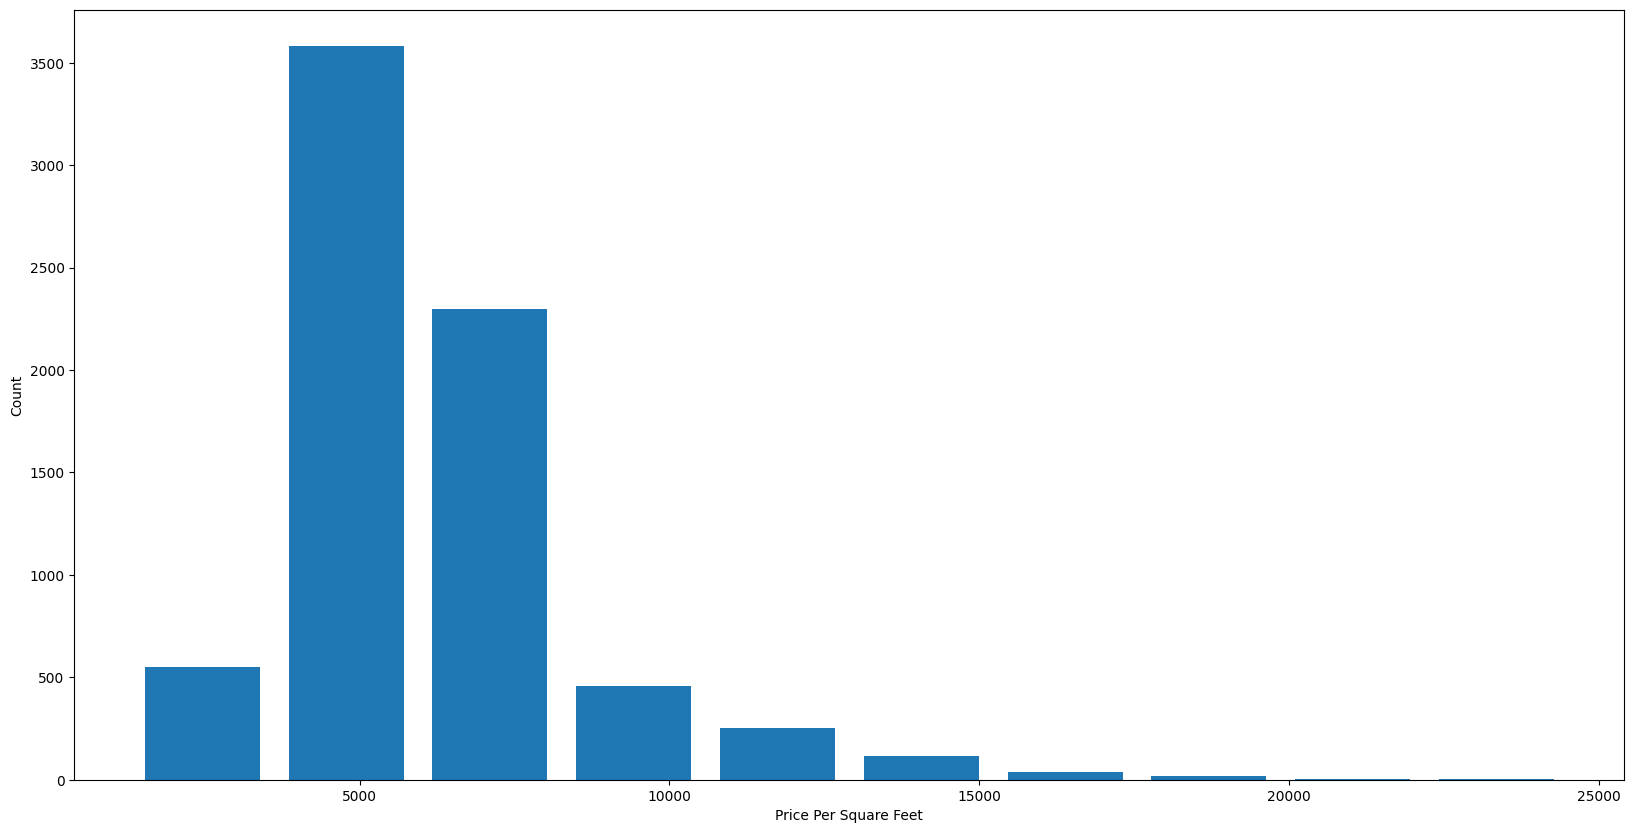

In [441]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(file.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [442]:
# From this graph it is clear that we have got more number of houses in the 0 to 10000 range

to remove the outlier in the bathroom we need to have bathroom such that they can be at most larger by one number than the number of the rooms in the hostel

In [443]:
file.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

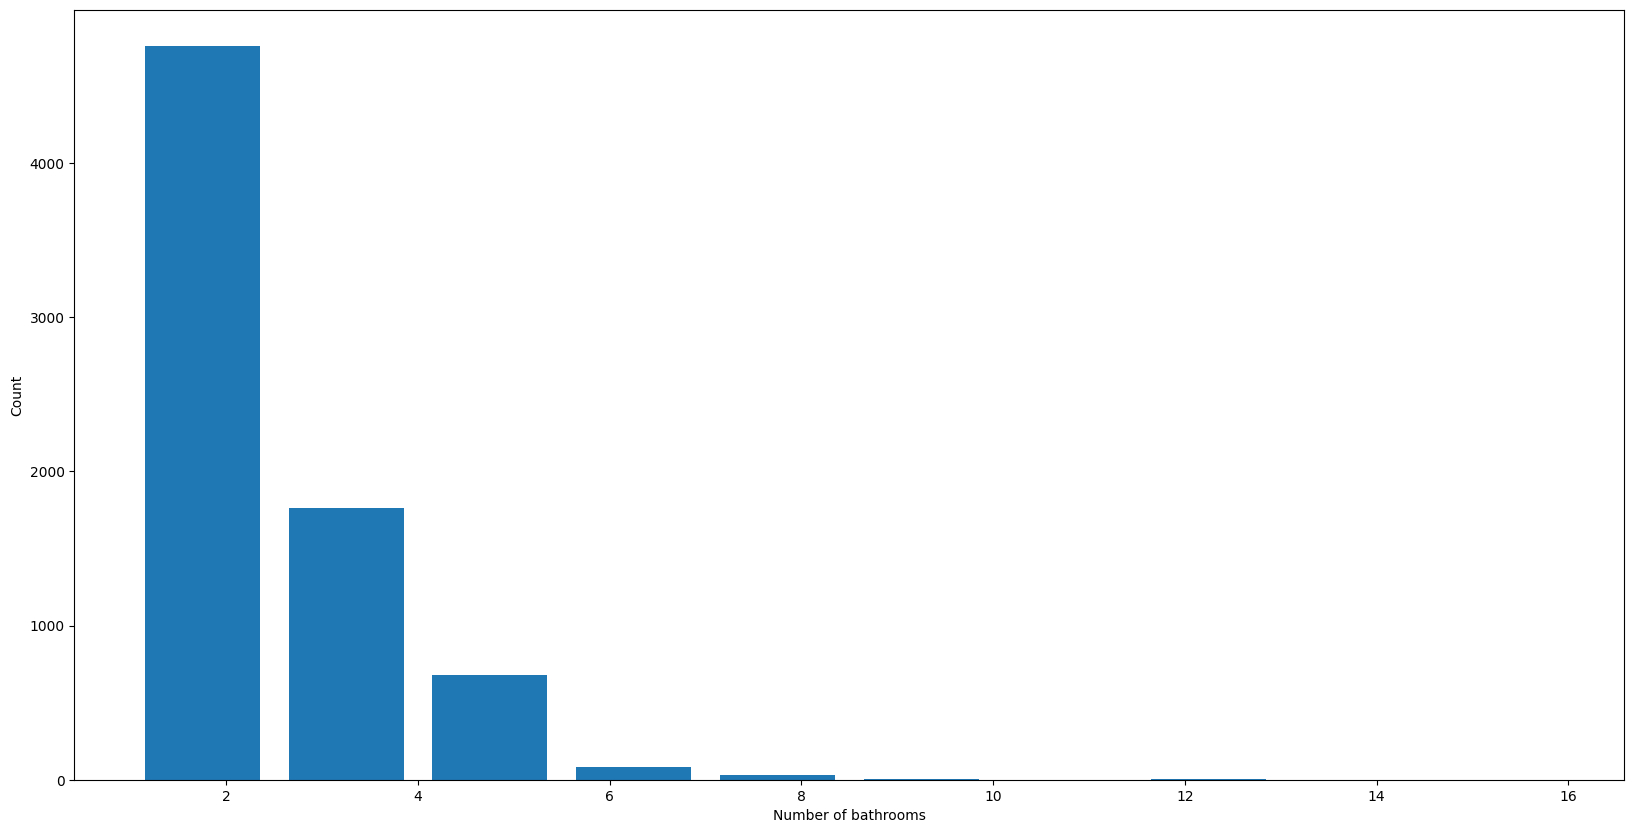

In [445]:
plt.hist(file.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [446]:
file[file.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [448]:
file[file.bath>file.bhk+2]
# As specified by the domain expert

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [449]:
file = file[file.bath<file.bhk+2]
file.shape

(7239, 7)

In [450]:
file.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [451]:
file = file.drop(['size','price_per_sqft'],axis='columns')
file.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
